<a href="https://colab.research.google.com/github/Nathalia-Prada/proyecto-integrador-equipo25/blob/main/Avance2Equipo25/Avance2Equipo25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance 2. Ingeniería de características**

Objetivos:

- 2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

- 2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.



###**Equipo 25**


### Estudiantes


* A01793899 - Andrés Julián López Hurtado
* A01793999 - Nathalia Milena Prada Hernández
* A01794404 - Victor Alejandro Regueira Romero

Fecha: 6 de octubre de 2024

# Instrucciones
Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

En esta fase, conocida como ingeniería de características (FE - Feature Engineering):

Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:
Generación de nuevas características
Discretización o binning
Codificación (ordinal, one hot,…)
Escalamiento (normalización, estandarización, min – max,…)
Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

* Todas las decisiones y técnicas empleadas deben ser justificadas.



Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:
Umbral de varianza
Correlación
Chi-cuadrado
ANOVA
Análisis de componentes principales (PCA)
Análisis factorial (FA)
* Es necesario fundamentar los métodos ejecutados.



Incluir conclusiones de la fase de "Preparación de los datos" en el contexto de la metodología CRISP-ML.

# Importar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rutas de archivos

In [ ]:
file_consumption = '/content/drive/MyDrive/TECForza/clean_silver_consumption.csv'
file_idling = '/content/drive/MyDrive/TECForza/clean_silver_idling.csv'
file_safety = '/content/drive/MyDrive/TECForza/clean_silver_safety.csv'

In [ ]:
file_consumption = '/content/drive/MyDrive/0-Actual/MNA/proyecto_integrador/clean_silver_consumption.csv'
file_idling = '/content/drive/MyDrive/0-Actual/MNA/proyecto_integrador/clean_silver_idling.csv'
file_safety = '/content/drive/MyDrive/0-Actual/MNA/proyecto_integrador/clean_silver_safety.csv'

# Feature Engineering Consumption

In [ ]:

# Create DataFrames for each file
df_consumption = pd.read_csv(file_consumption)
df_idling = pd.read_csv(file_idling)
df_safety = pd.read_csv(file_safety)


### Umbral de Varianza

Se aplicará la selección de características por umbral de varianza dentro de un pipeline, manteniendo el proceso de escalamiento con **MinMaxScaler**. El método de selección de características puede ajustarse según las preferencias del usuario.

- **VarianceThreshold**: Este paso elimina características cuya varianza está por debajo de un umbral definido. Si la varianza de una característica es baja, es probable que no aporte suficiente información relevante, por lo que puede eliminarse.

- **SelectFromModel**: En este caso, se emplea un modelo de clasificación (**RandomForestClassifier**) para seleccionar automáticamente las características más importantes, basándose en la relevancia según el modelo de árboles. Si se trabaja con un conjunto de datos supervisado, es posible utilizar otros modelos de selección.

- **Pipeline Completo**: Cada pipeline aplica en primer lugar la normalización mediante **MinMaxScaler**. A continuación, se realiza la selección de características utilizando **VarianceThreshold** o **SelectFromModel**, dependiendo de la naturaleza de la tabla y el contexto de aplicación.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Crear una lista de columnas que serán normalizadas en cada DataFrame
columns_consumption = ['total_distance_used_sum', 'total_fuel_used_sum', 'consumption', 'performance']
columns_idling = ['distance', 'idlingDuration_hours', 'IdlingCost', 'CurrentFuelPrice']
columns_safety = ['SpeedLimit1Count', 'HardAccelerationCount', 'HarshBrakingCount', 'MaxSpeed']

# Pipeline para consumo, añadiendo selección por umbral de varianza
pipeline_consumption = Pipeline(steps=[
    ('scaler', ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), columns_consumption)
    ], remainder='passthrough')),
    ('variance_threshold', VarianceThreshold(threshold=0.1)) # Eliminamos características con varianza baja
])

# Pipeline para idling con selección por importancia usando RandomForest
pipeline_idling = Pipeline(steps=[
    ('scaler', ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), columns_idling)
    ], remainder='passthrough')),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100))) # Selección de características
])

# Pipeline para seguridad, añadiendo selección de características con umbral de varianza
pipeline_safety = Pipeline(steps=[
    ('scaler', ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), columns_safety)
    ], remainder='passthrough')),
    ('variance_threshold', VarianceThreshold(threshold=0.1)) # Selección de características con baja varianza
])

# Aplicar el pipeline a los DataFrames respectivos
df_consumption_transformed = pipeline_consumption.fit_transform(df_consumption)
df_idling_transformed = pipeline_idling.fit_transform(df_idling, y=None) # Asumimos que y está disponible si es supervisado
df_safety_transformed = pipeline_safety.fit_transform(df_safety)

# Convertimos los resultados escalados y transformados nuevamente a DataFrames
df_consumption_transformed = pd.DataFrame(df_consumption_transformed, columns=df_consumption.columns)
df_idling_transformed = pd.DataFrame(df_idling_transformed, columns=df_idling.columns)
df_safety_transformed = pd.DataFrame(df_safety_transformed, columns=df_safety.columns)



In [ ]:
pipeline_consumption

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['total_distance_used_sum',
                                                   'total_fuel_used_sum',
                                                   'consumption',
                                                   'performance'])]))])

In [ ]:
pipeline_idling

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['distance',
                                                   'idlingDuration_hours',
                                                   'IdlingCost',
                                                   'CurrentFuelPrice'])]))])

In [ ]:
pipeline_safety

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['SpeedLimit1Count',
                                                   'HardAccelerationCount',
                                                   'HarshBrakingCount',
                                                   'MaxSpeed'])]))])

# PCA

Para aplicar el **Análisis de Componentes Principales (PCA)** en un pipeline de `sklearn`, se añade el paso de PCA después de la normalización de las características numéricas. Este método es útil cuando las características están correlacionadas y se busca reducir la dimensionalidad manteniendo la mayor parte de la variabilidad.

El enfoque incluye filtrar las columnas no numéricas para evitar errores, y luego aplicar normalización y PCA exclusivamente a las columnas numéricas. La normalización asegura que los valores estén dentro de un rango común, mientras que PCA reduce la dimensionalidad al conservar la mayor parte de la información contenida en los datos originales.

Este proceso mejora la eficiencia del modelo al eliminar redundancias y simplificar la interpretación de los datos. El uso de pipelines facilita la reproducibilidad, modularidad y escalabilidad del flujo de trabajo, permitiendo implementar cambios o mejoras en el futuro sin complicaciones.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import pandas as pd

# Filtrar las columnas numéricas, excluyendo las no numéricas (como fechas)
df_consumption_numeric = df_consumption.select_dtypes(include=['float64', 'int64'])
df_idling_numeric = df_idling.select_dtypes(include=['float64', 'int64'])
df_safety_numeric = df_safety.select_dtypes(include=['float64', 'int64'])

# Número de componentes principales que queremos mantener
n_components_pca = 4

# Crear el pipeline para consumo con PCA
pipeline_consumption = Pipeline(steps=[
    ('scaler', MinMaxScaler()), # Aplicamos MinMaxScaler
    ('pca', PCA(n_components=n_components_pca)) # Aplicamos PCA
])

# Crear el pipeline para idling con PCA
pipeline_idling = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=n_components_pca))
])

# Crear el pipeline para seguridad con PCA
pipeline_safety = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=n_components_pca))
])

# Aplicar los pipelines a los DataFrames respectivos (solo con columnas numéricas)
df_consumption_pca = pipeline_consumption.fit_transform(df_consumption_numeric)
df_idling_pca = pipeline_idling.fit_transform(df_idling_numeric)
df_safety_pca = pipeline_safety.fit_transform(df_safety_numeric)

# Convertir los resultados de PCA nuevamente a DataFrames
df_consumption_pca = pd.DataFrame(df_consumption_pca, columns=[f'PC{i+1}' for i in range(n_components_pca)])
df_idling_pca = pd.DataFrame(df_idling_pca, columns=[f'PC{i+1}' for i in range(n_components_pca)])
df_safety_pca = pd.DataFrame(df_safety_pca, columns=[f'PC{i+1}' for i in range(n_components_pca)])

# Mostrar las primeras filas de cada DataFrame transformado
df_consumption_pca.head(), df_idling_pca.head(), df_safety_pca.head()


(        PC1       PC2       PC3       PC4
 0 -0.182286  0.195950  0.061322  0.008082
 1 -0.153900  0.231632 -0.007756  0.004150
 2 -0.009472 -0.272115 -0.041064  0.068658
 3  0.182148 -0.355940  0.295169  0.011021
 4  0.185695 -0.068675  0.275318 -0.002455,
         PC1       PC2       PC3       PC4
 0  0.115663  0.027515 -0.150080  0.236610
 1 -0.002156  0.177730 -0.013271  0.146974
 2  0.465442  0.082060  0.249354  0.016937
 3 -0.204525  0.311121  0.032185  0.107721
 4 -0.090211  0.159403 -0.113944  0.205597,
         PC1       PC2       PC3       PC4
 0 -0.925846 -0.004025  0.031026 -0.181201
 1 -0.334831 -0.106026 -0.035279  0.122700
 2  0.911064  0.172607  0.056537 -0.145612
 3 -0.870348 -0.026115 -0.023692 -0.097140
 4  0.332225 -0.230698 -0.051643 -0.092567)

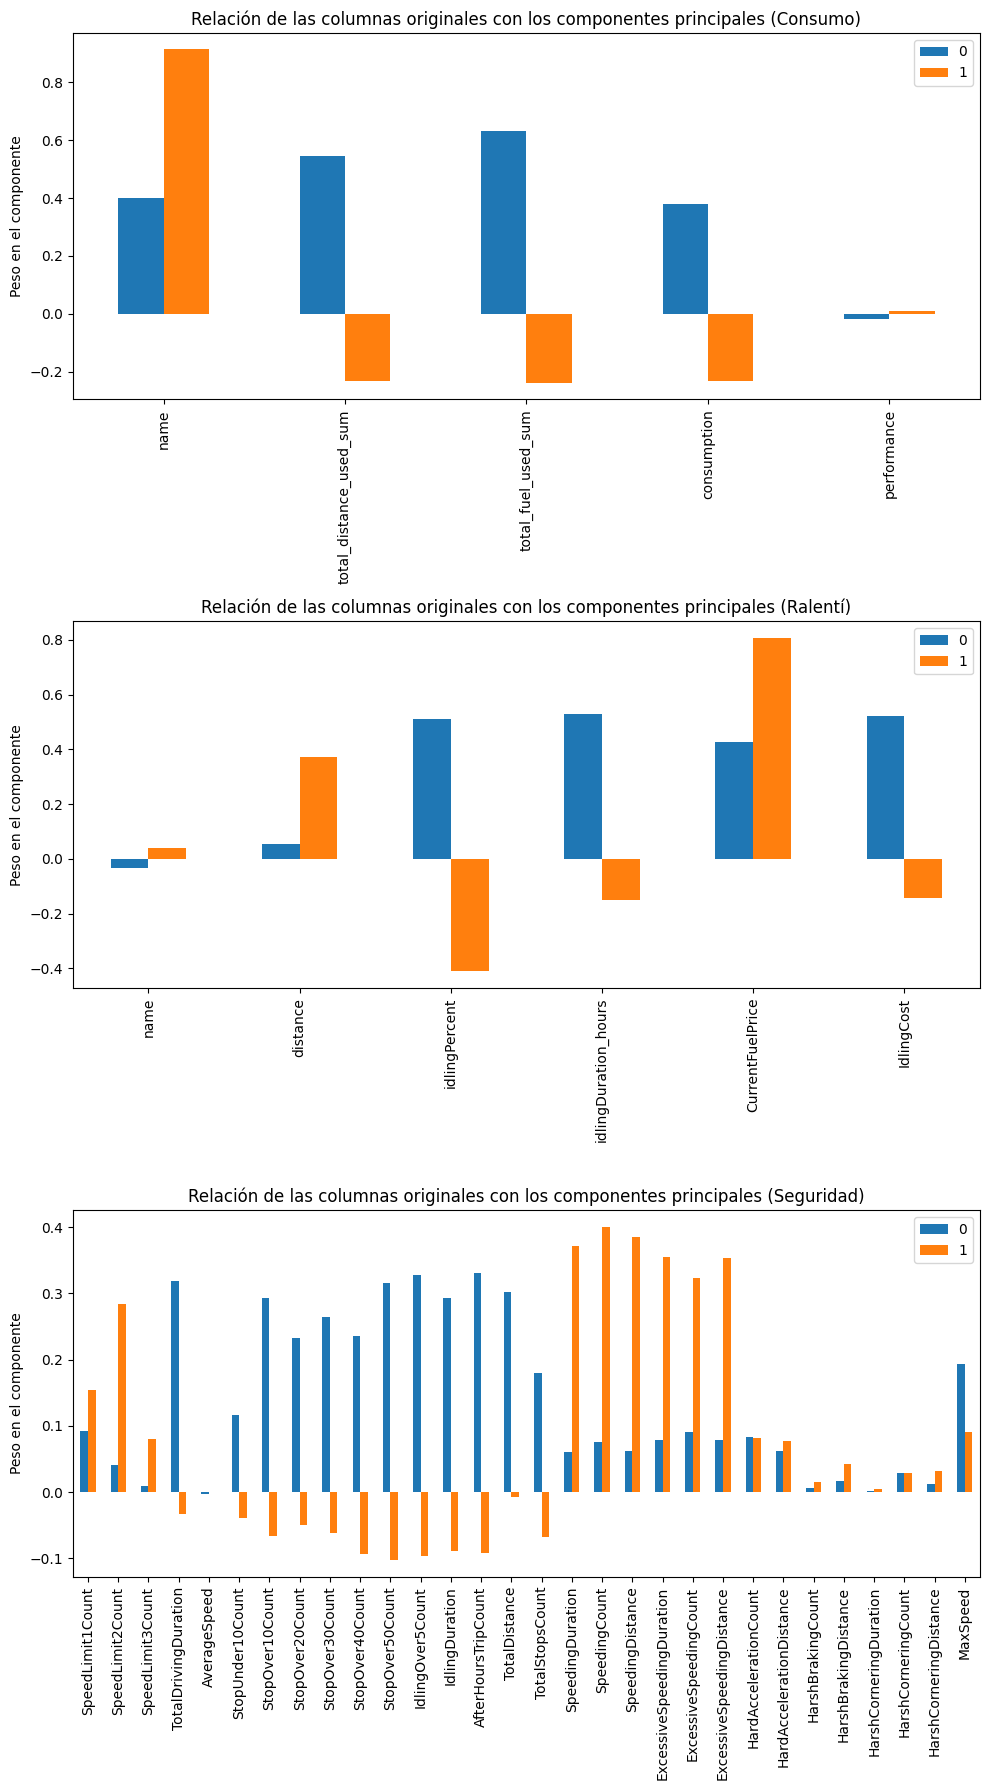

In [ ]:
# Crear gráficos que muestren la relación entre los componentes principales y las columnas originales

# Obtener los nombres de las columnas originales
columns_consumption = df_consumption_numeric.columns
columns_idling = df_idling_numeric.columns
columns_safety = df_safety_numeric.columns

# Acceder a los componentes del PCA para cada pipeline
pca_consumption = pipeline_consumption.named_steps['pca']
pca_idling = pipeline_idling.named_steps['pca']
pca_safety = pipeline_safety.named_steps['pca']

# Convertir los componentes en DataFrames para facilitar la visualización
df_pca_consumption = pd.DataFrame(pca_consumption.components_, columns=columns_consumption)
df_pca_idling = pd.DataFrame(pca_idling.components_, columns=columns_idling)
df_pca_safety = pd.DataFrame(pca_safety.components_, columns=columns_safety)

# Graficar los pesos de las columnas originales en los primeros dos componentes principales para cada conjunto de datos

fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Gráfico para df_consumption
df_pca_consumption.iloc[0:2].T.plot(kind='bar', ax=ax[0])
ax[0].set_title('Relación de las columnas originales con los componentes principales (Consumo)')
ax[0].set_ylabel('Peso en el componente')

# Gráfico para df_idling
df_pca_idling.iloc[0:2].T.plot(kind='bar', ax=ax[1])
ax[1].set_title('Relación de las columnas originales con los componentes principales (Ralentí)')
ax[1].set_ylabel('Peso en el componente')

# Gráfico para df_safety
df_pca_safety.iloc[0:2].T.plot(kind='bar', ax=ax[2])
ax[2].set_title('Relación de las columnas originales con los componentes principales (Seguridad)')
ax[2].set_ylabel('Peso en el componente')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()



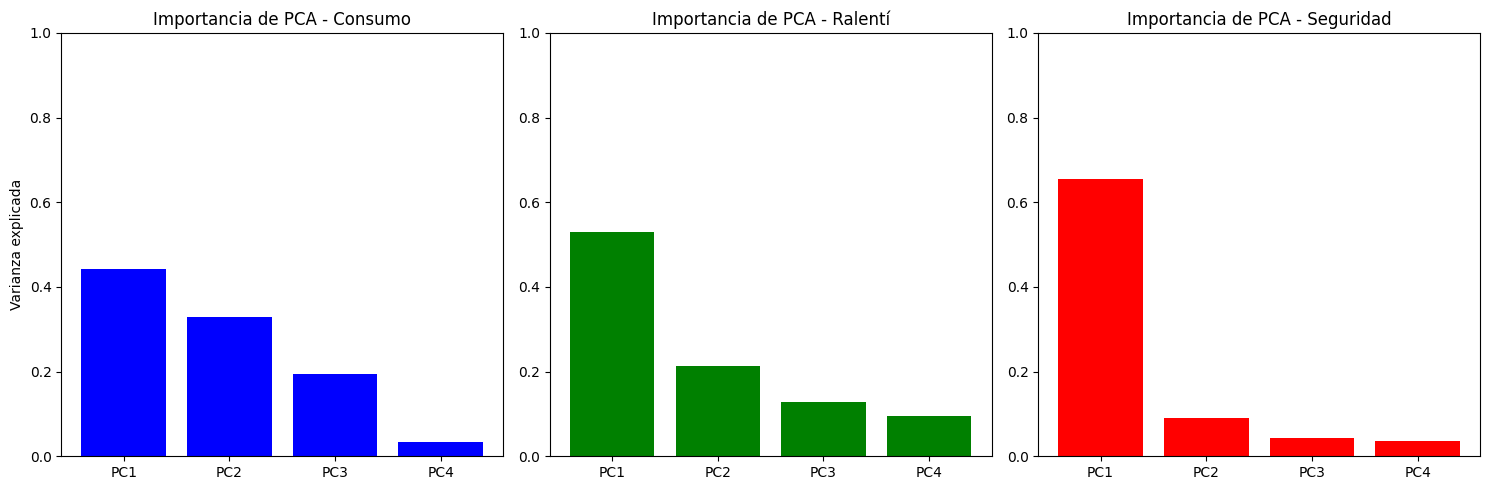

In [ ]:
# Recreamos los pipelines de PCA para obtener la varianza explicada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Número de componentes principales que queremos mantener
n_components_pca = 4

# Crear el pipeline para consumo con PCA
pipeline_consumption = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=n_components_pca)) # Aplicamos PCA
])

# Crear el pipeline para idling con PCA
pipeline_idling = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=n_components_pca))
])

# Crear el pipeline para seguridad con PCA
pipeline_safety = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=n_components_pca))
])

# Aplicar los pipelines a los DataFrames respectivos (solo con columnas numéricas)
df_consumption_numeric = df_consumption.select_dtypes(include=['float64', 'int64'])
df_idling_numeric = df_idling.select_dtypes(include=['float64', 'int64'])
df_safety_numeric = df_safety.select_dtypes(include=['float64', 'int64'])

# Ajustar los pipelines
df_consumption_pca = pipeline_consumption.fit_transform(df_consumption_numeric)
df_idling_pca = pipeline_idling.fit_transform(df_idling_numeric)
df_safety_pca = pipeline_safety.fit_transform(df_safety_numeric)

# Obtener la varianza explicada de cada PCA
pca_consumption_explained_variance = pipeline_consumption.named_steps['pca'].explained_variance_ratio_
pca_idling_explained_variance = pipeline_idling.named_steps['pca'].explained_variance_ratio_
pca_safety_explained_variance = pipeline_safety.named_steps['pca'].explained_variance_ratio_

# Graficar la importancia de los componentes para cada dataset
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Etiquetas de los componentes
components = [f'PC{i+1}' for i in range(n_components_pca)]

# Gráfico para df_consumption_pca
ax[0].bar(components, pca_consumption_explained_variance, color='b')
ax[0].set_title('Importancia de PCA - Consumo')
ax[0].set_ylabel('Varianza explicada')
ax[0].set_ylim([0, 1])

# Gráfico para df_idling_pca
ax[1].bar(components, pca_idling_explained_variance, color='g')
ax[1].set_title('Importancia de PCA - Ralentí')
ax[1].set_ylim([0, 1])

# Gráfico para df_safety_pca
ax[2].bar(components, pca_safety_explained_variance, color='r')
ax[2].set_title('Importancia de PCA - Seguridad')
ax[2].set_ylim([0, 1])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


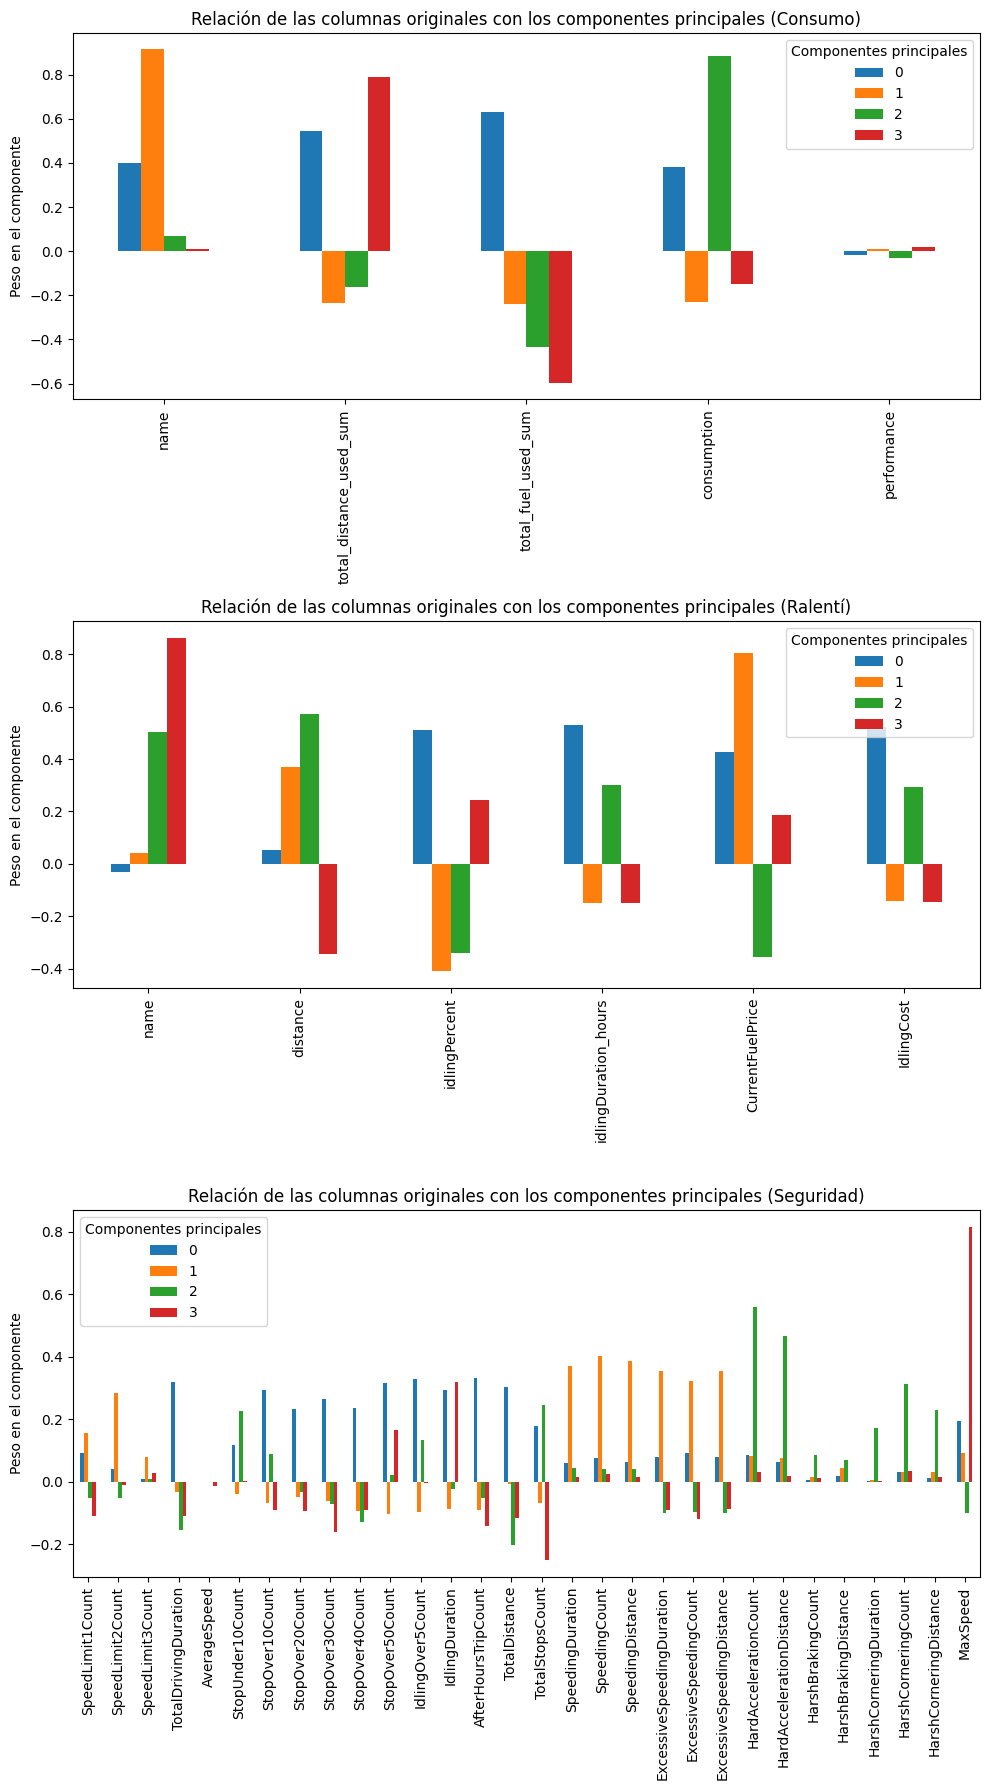

In [ ]:
# Graficar los pesos de las columnas originales en los primeros componentes principales para cada conjunto de datos
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Gráfico para df_consumption
df_pca_consumption.iloc[0:4].T.plot(kind='bar', ax=ax[0])
ax[0].set_title('Relación de las columnas originales con los componentes principales (Consumo)')
ax[0].set_ylabel('Peso en el componente')
ax[0].legend(title="Componentes principales")

# Gráfico para df_idling
df_pca_idling.iloc[0:4].T.plot(kind='bar', ax=ax[1])
ax[1].set_title('Relación de las columnas originales con los componentes principales (Ralentí)')
ax[1].set_ylabel('Peso en el componente')
ax[1].legend(title="Componentes principales")

# Gráfico para df_safety
df_pca_safety.iloc[0:4].T.plot(kind='bar', ax=ax[2])
ax[2].set_title('Relación de las columnas originales con los componentes principales (Seguridad)')
ax[2].set_ylabel('Peso en el componente')
ax[2].legend(title="Componentes principales")

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()


### Beneficios generales del uso de PCA:

- **Reducción de la dimensionalidad**: Al reducir el número de variables, se simplifica el modelo, haciéndolo más rápido de entrenar y evitando problemas como la multicolinealidad, cuando dos o más variables están altamente correlacionadas.
  
- **Mejora de la interpretabilidad**: Con menos variables, es más sencillo analizar e interpretar el comportamiento de los datos, facilitando la toma de decisiones informadas.

- **Optimización del rendimiento del modelo**: Al eliminar características redundantes y reducir las dimensiones no informativas, se mejora el rendimiento del modelo, permitiendo enfoques más eficientes y precisos.

### Fase de "Preparación de los Datos" en el contexto de CRISP-ML

En la fase de **Preparación de los Datos** de la metodología **CRISP-ML** (Cross Industry Standard Process for Machine Learning), se ha seguido un enfoque estructurado para transformar los datos crudos en un formato adecuado para su uso en modelos de aprendizaje automático.

1. **Selección de Datos**: Se filtraron las columnas no numéricas, como las fechas, que no aportan directamente al análisis y podrían causar errores en los pasos posteriores. Solo se conservaron las características numéricas, relevantes para el modelado y las transformaciones estadísticas.

2. **Limpieza de Datos**: No se identificaron valores nulos o faltantes en los conjuntos de datos proporcionados, por lo que no fue necesario aplicar estrategias de imputación. Este paso podría abarcar la detección y eliminación de posibles valores atípicos en fases futuras, si se requiere.

3. **Construcción de Datos**: Se aplicaron transformaciones como la normalización (**Min-Max Scaling**) para garantizar que todas las características numéricas se encuentren en un rango comparable, evitando que algunas variables dominen a otras debido a diferencias de escala.

4. **Integración de Datos**: Aunque no se integraron múltiples fuentes de datos en esta fase, el pipeline asegura que el mismo proceso puede repetirse con otros conjuntos de datos si fuera necesario.

5. **Formateo de Datos**: Se aplicó **Análisis de Componentes Principales (PCA)**, lo que permitió reducir la dimensionalidad del conjunto de datos sin pérdida significativa de información. Esto optimiza el modelo al mantener las componentes más relevantes.

### **Conclusión**

Esta fase transformó los datos a un formato adecuado para modelado, reduciendo su complejidad y eliminando redundancias. Así, se asegura que los algoritmos funcionen de manera eficiente y precisa, cumpliendo con las mejores prácticas de preparación de datos en CRISP-ML y manteniendo flexibilidad para adaptar estos pasos a nuevas fuentes de datos o futuras tareas de análisis.



---



# Union de tablas
##Unión de tablas consumption e idling. Paso 1

### Creación de la nueva tabla `df_union1`

La tabla **`df_union1`** se basará en los datos del DataFrame **`df_consumption`**, lo que significa que todas las columnas y datos presentes en **`df_consumption`** serán trasladados sin modificaciones a **`df_union1`**.

#### Añadir las columnas de `df_idling`
A continuación, se agregarán a **`df_union1`** todas las columnas de **`df_idling`**, excepto la columna **`unique_id`**. Esto implica realizar una unión entre **`df_idling`** y **`df_consumption`**, respetando las columnas comunes, pero añadiendo las nuevas columnas presentes en **`df_idling`** y no en **`df_consumption`**.

#### Unión basada en una llave compuesta por `name` y `date`
Los DataFrames se unirán utilizando una clave compuesta, generada a partir de la concatenación de las columnas **`name`** y **`date`** en ambas tablas. Esta clave asegura que las filas se correspondan correctamente entre **`df_idling`** y **`df_consumption`**, uniendo la información donde los valores de **`name`** y **`date`** coincidan.

### Resumen
En resumen, se creará una nueva tabla llamada **`df_union1`** que combinará los datos de **`df_consumption`** y **`df_idling`**, respetando las columnas comunes y añadiendo las columnas exclusivas de **`df_idling`**. La unión se realizará utilizando la clave compuesta formada por **`name`** y **`date`**, garantizando una correcta alineación de los datos entre ambos DataFrames.












In [ ]:
# Crear una nueva columna de llave combinada en ambos DataFrames
df_consumption['key'] = df_consumption['name'].astype(str) + df_consumption['date'] # Convert 'name' column to string before concatenation
df_idling['key'] = df_idling['name'].astype(str) + df_idling['date'] # Convert 'name' column to string before concatenation

# Eliminar la columna 'unique_id' de df_idling
df_idling = df_idling.drop(columns=['unique_id'])

# Unir los DataFrames usando la llave combinada 'key'
df_union1 = pd.merge(df_consumption, df_idling, on='key', how='left')

# Eliminar la columna 'key' después de la unión
df_union1 = df_union1.drop(columns=['key'])

# Mostrar el resultado
df_union1.head()


,name_x,date_x,total_distance_used_sum,total_fuel_used_sum,consumption,performance,date_y,name_y,distance,idlingDuration,idlingPercent,idlingDuration_hours,CurrentFuelPrice,IdlingCost
0,986,2024-07-01,115.575006,15.321976,7.543088,0.132572,2024-07-01,986.0,30.063228,08:12:02,87.0,8.20,3.813,31.27
1,1038,2024-07-01,167.770170,25.096340,6.685045,0.149588,2024-07-01,1038.0,72.647624,06:53:43,62.0,6.90,3.813,26.31
2,502,2024-07-02,1025.262150,68.948892,8.653096,0.067250,2024-07-02,502.0,912.121800,11:00:31,46.0,11.01,3.813,41.98
3,532,2024-07-02,1103.554896,75.817364,14.555437,0.068703,2024-07-02,532.0,554.235964,01:34:01,14.0,1.57,3.813,5.99
4,880,2024-07-02,857.491980,64.193796,13.357864,0.074862,2024-07-02,880.0,429.840038,20:46:51,73.0,20.78,3.813,79.23


Al unir ambos DataFrames, se decidió mantener los valores originales de las columnas **`name`** y **`date`** provenientes de la tabla **`df_idling`**. Esto garantiza que la unión se realice de manera correcta, preservando la coherencia de los datos entre las dos tablas. Al conservar estos valores intactos, se asegura que la combinación respete la correspondencia adecuada entre las filas de **`df_consumption`** y **`df_idling`**, evitando posibles errores en la integración de la información.

In [ ]:
# prompt: Con DataFrame df_union1: eliminar las columnas date_y y name_y, cambiar los nombres name_x y date_x por name y date respectivamente

# Eliminar las columnas date_y y name_y
df_union1 = df_union1.drop(['date_y', 'name_y'], axis=1)

# Cambiar los nombres name_x y date_x por name y date respectivamente
df_union1 = df_union1.rename(columns={'name_x': 'name', 'date_x': 'date'})


In [ ]:
df_union1.head()

,name,date,total_distance_used_sum,total_fuel_used_sum,consumption,performance,distance,idlingDuration,idlingPercent,idlingDuration_hours,CurrentFuelPrice,IdlingCost
0,986,2024-07-01,115.575006,15.321976,7.543088,0.132572,30.063228,08:12:02,87.0,8.20,3.813,31.27
1,1038,2024-07-01,167.770170,25.096340,6.685045,0.149588,72.647624,06:53:43,62.0,6.90,3.813,26.31
2,502,2024-07-02,1025.262150,68.948892,8.653096,0.067250,912.121800,11:00:31,46.0,11.01,3.813,41.98
3,532,2024-07-02,1103.554896,75.817364,14.555437,0.068703,554.235964,01:34:01,14.0,1.57,3.813,5.99
4,880,2024-07-02,857.491980,64.193796,13.357864,0.074862,429.840038,20:46:51,73.0,20.78,3.813,79.23


Se identificó que la tabla **`df_idling`** presenta datos faltantes para algunos camiones en determinadas fechas, además de contener filas duplicadas. Esta situación genera que, al realizar la unión con **`df_consumption`**, algunas filas queden incompletas.

Como resultado, el DataFrame combinado tiene un total de 43,033 filas, de las cuales 31,121 contienen datos completos, lo que representa el 72% del total.

In [ ]:
# prompt: Con DataFrame df_union1: de la tabla df_union1 quiero contar cuántas filas de la columna "distance" tiene valores distintos de vacío

# Count the number of non-empty rows in the 'distance' column.
non_empty_distance_count = df_union1['distance'].notna().sum()

# Print the result
print(non_empty_distance_count)

31121


A continuación, se muestra gráficamente el porcentaje de datos faltantes en las columnas del DataFrame resultante, lo que permite visualizar la distribución de las filas incompletas tras la unión de los conjuntos de datos:

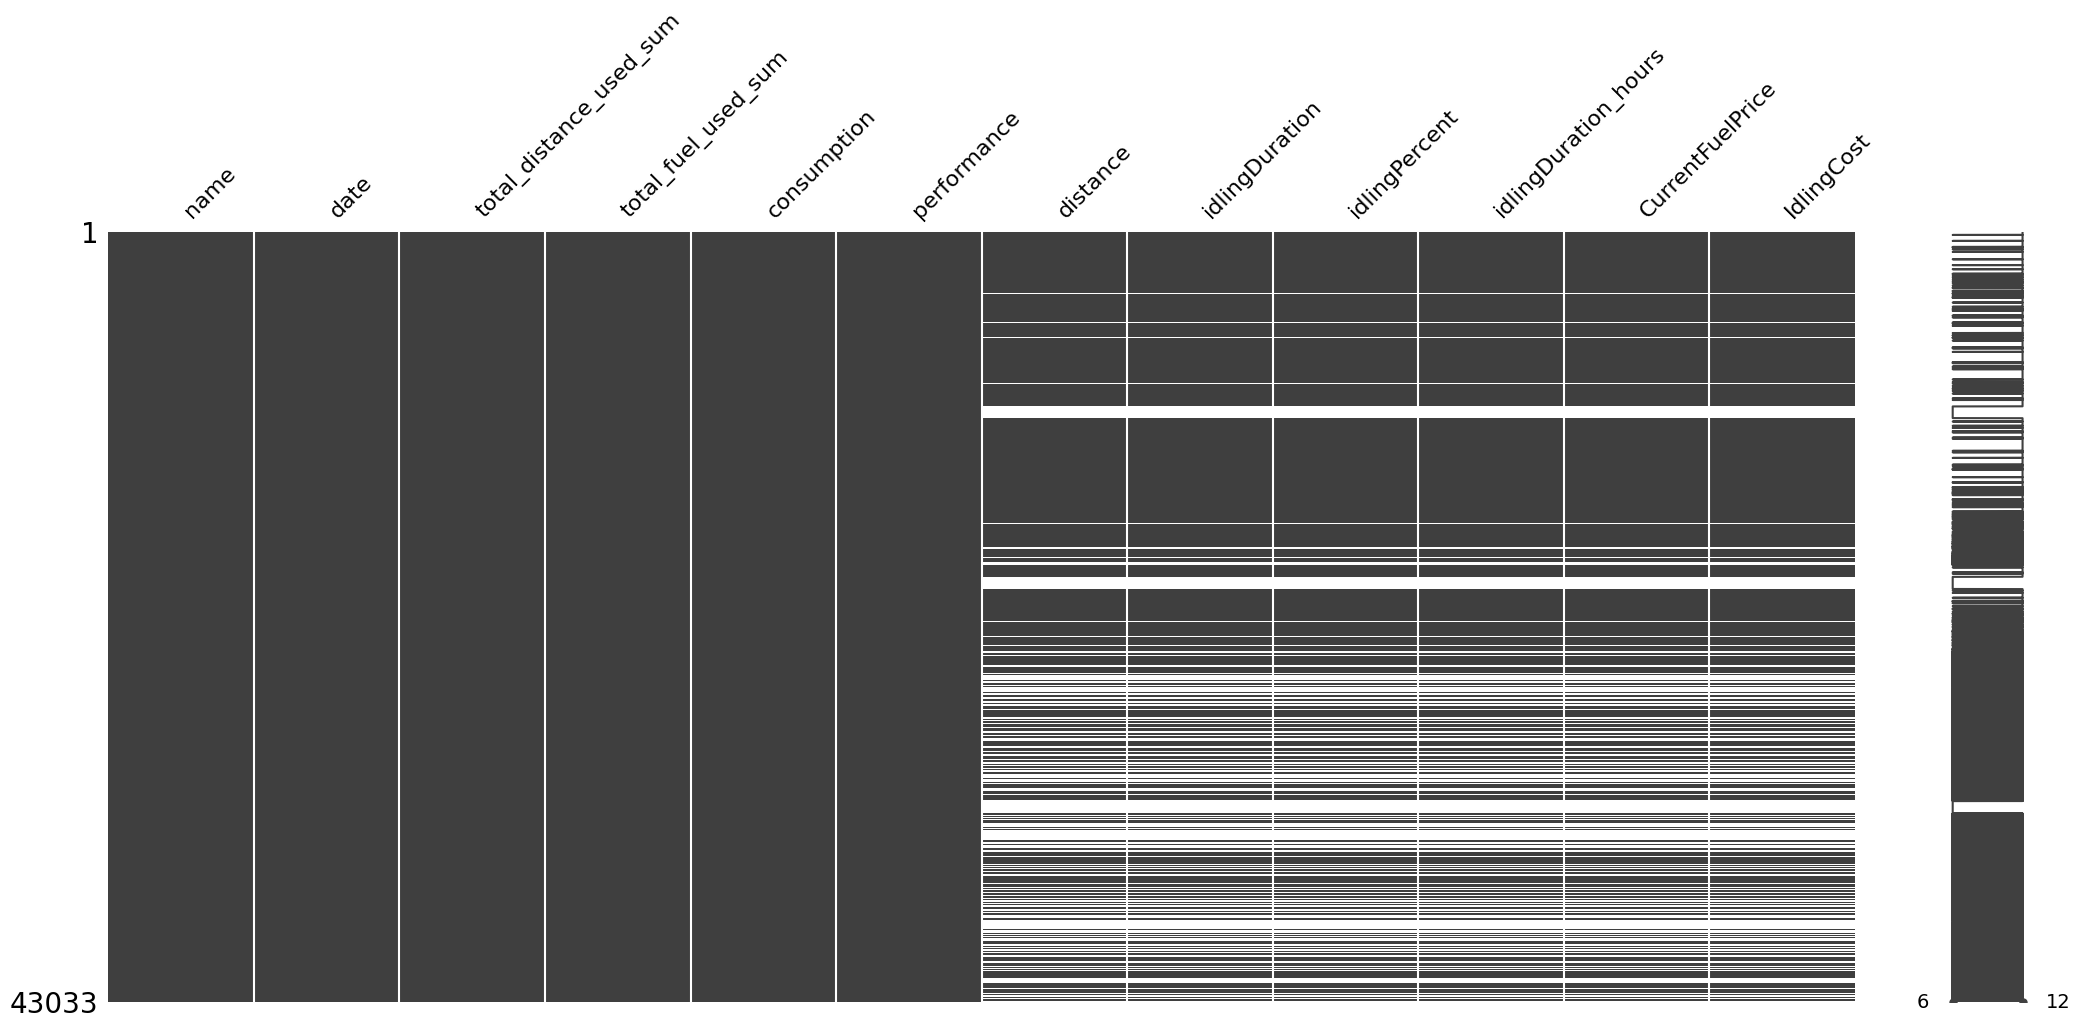

In [ ]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_union1)
plt.show()

## Tratamiento de los datos faltantes

En este punto, es recomendable considerar alguna técnica para manejar los datos en blanco. En este caso, se asumirá que las fechas con datos faltantes representan períodos sin actividad de ralentí (**idling**), por lo que los valores nulos se reemplazarán por ceros.

Este cambio se realizará en una copia del DataFrame original, creando una nueva tabla llamada **df_union1_1** para preservar la integridad de los datos originales.

In [ ]:
df_union1_1 = df_union1.copy()

In [ ]:
df_union1_1.fillna(0, inplace=True)


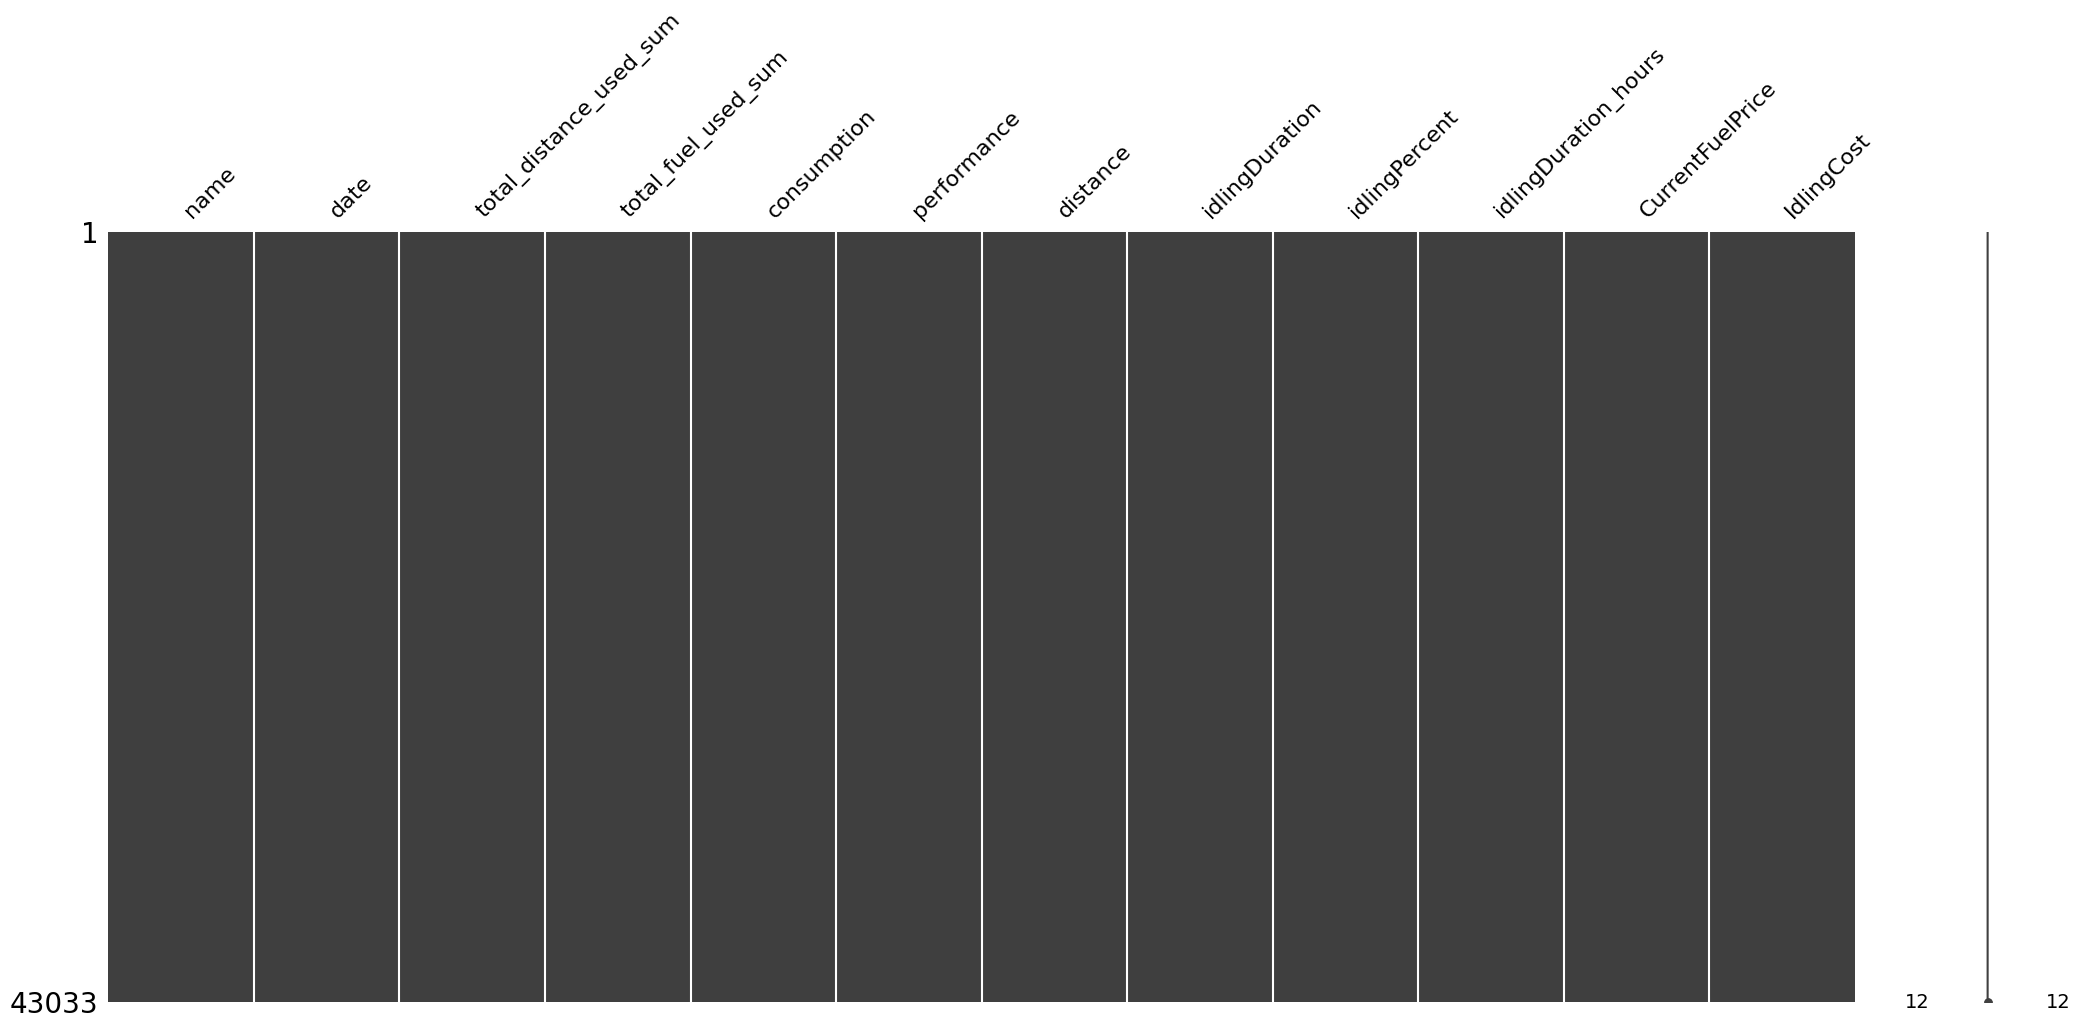

In [ ]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_union1_1)
plt.show()

## Unión de tablas `df_union1_1` con `df_safety` - Paso 2

En esta fase, se procederá a integrar la tabla `df_union1_1` con la tabla `df_safety`. Para lograr esto, se seguirán los siguientes pasos:

1. Asegurarse de que las columnas `name` en `df_union1_1` y `DeviceName` en `df_safety` tengan el mismo tipo de dato (probablemente `string`), para evitar errores en la unión.
2. Realizar una unión entre ambas tablas utilizando las columnas `name` y `DeviceName` como claves de unión.
3. Conservar toda la información de `df_union1_1` y añadir las columnas adicionales de `df_safety`, generando una nueva tabla denominada `df_union2`.







In [ ]:
# Asegurarse de que 'name' y 'DeviceName' sean del mismo tipo
df_union1_1['name'] = df_union1_1['name'].astype(str)
df_safety['DeviceName'] = df_safety['DeviceName'].astype(str)

# Realizar la unión de los DataFrames
df_union2 = pd.merge(df_union1_1, df_safety, left_on='name', right_on='DeviceName', how='left')

# Opcional: eliminar la columna 'DeviceName' si ya no es necesaria
df_union2 = df_union2.drop(columns=['DeviceName'])

# Mostrar el resultado
df_union2.head()


,name,date,total_distance_used_sum,total_fuel_used_sum,consumption,performance,distance,idlingDuration,idlingPercent,idlingDuration_hours,...,ExcessiveSpeedingCount,ExcessiveSpeedingDistance,HardAccelerationCount,HardAccelerationDistance,HarshBrakingCount,HarshBrakingDistance,HarshCorneringDuration,HarshCorneringCount,HarshCorneringDistance,MaxSpeed
0,986,2024-07-01,115.575006,15.321976,7.543088,0.132572,30.063228,08:12:02,87.0,8.20,...,159.0,50.848373,133.0,0.057267,1.0,0.000096,0.0,43.0,0.006195,83.885109
1,1038,2024-07-01,167.770170,25.096340,6.685045,0.149588,72.647624,06:53:43,62.0,6.90,...,19.0,2.382248,17.0,0.002865,0.0,0.000000,0.0,28.0,0.002594,76.428658
2,502,2024-07-02,1025.262150,68.948892,8.653096,0.067250,912.121800,11:00:31,46.0,11.01,...,105.5,38.452164,48.0,0.020623,0.5,0.000332,0.0,39.5,0.009367,42.874611
3,532,2024-07-02,1103.554896,75.817364,14.555437,0.068703,554.235964,01:34:01,14.0,1.57,...,3.5,0.055369,77.5,0.065764,0.0,0.000000,0.0,18.5,0.007460,38.835701
4,880,2024-07-02,857.491980,64.193796,13.357864,0.074862,429.840038,20:46:51,73.0,20.78,...,402.0,123.554245,59.0,0.020675,0.0,0.000000,0.0,37.0,0.020335,83.885109


In [ ]:
df_union2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43033 entries, 0 to 43032
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       43033 non-null  object 
 1   date                       43033 non-null  object 
 2   total_distance_used_sum    43033 non-null  float64
 3   total_fuel_used_sum        43033 non-null  float64
 4   consumption                43033 non-null  float64
 5   performance                43033 non-null  float64
 6   distance                   43033 non-null  float64
 7   idlingDuration             43033 non-null  object 
 8   idlingPercent              43033 non-null  float64
 9   idlingDuration_hours       43033 non-null  float64
 10  CurrentFuelPrice           43033 non-null  float64
 11  IdlingCost                 43033 non-null  float64
 12  SpeedLimit1Count           43033 non-null  float64
 13  SpeedLimit2Count           43033 non-null  flo

## Visualización de la Base de Datos Unida

A continuación, se presenta la visualización de la base de datos después de la unión, destacando las áreas con datos faltantes para un análisis más detallado de la completitud de la información.

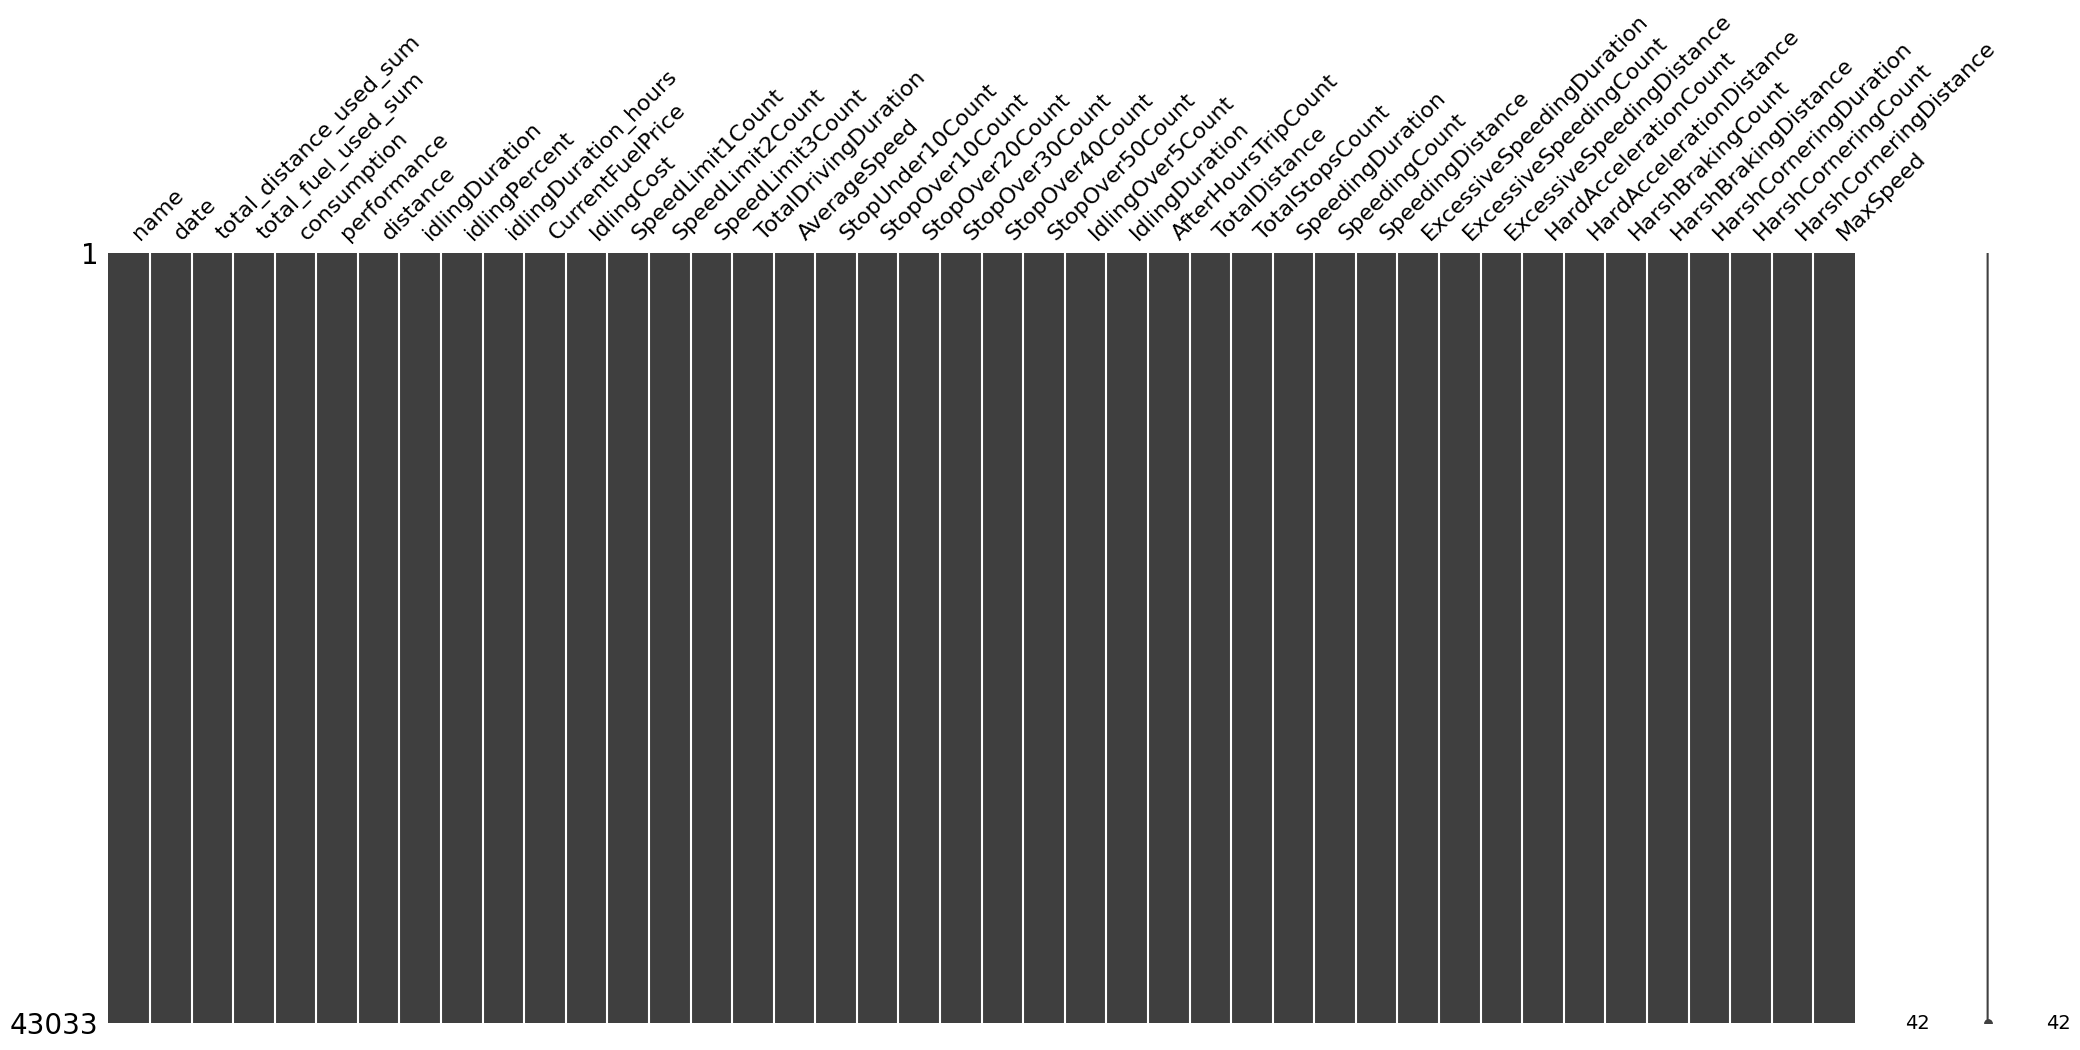

In [ ]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_union2)
plt.show()

In [ ]:
# Guardar el DataFrame df_union_2 como CSV en la carpeta TECForza
file_path = '/content/drive/MyDrive/TECForza/df_union2.csv'
#df_union2.to_csv(file_path, index=False)

## Análisis de componentes principales.

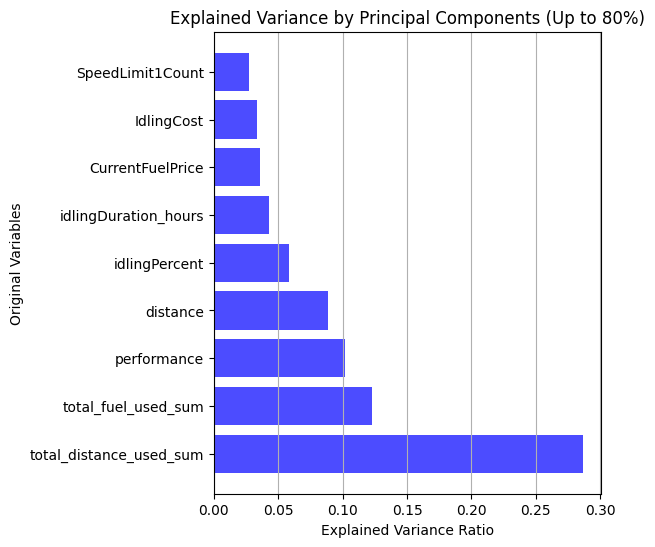

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar los datos
file_path = '/content/drive/MyDrive/TECForza/df_union2.csv'
#df = pd.read_csv(file_path)
df = df_union2.copy()
# Paso 2: Seleccionar solo las columnas numéricas relevantes, excluyendo la variable de salida 'consumption'
df_numeric = df.drop(columns=['name', 'date', 'consumption', 'idlingDuration'])

# Paso 3: Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Paso 4: Realizar el PCA
pca = PCA()
pca.fit(df_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Paso 5: Ordenar las variancias explicadas de mayor a menor y calcular la varianza acumulada
explained_variance_sorted_indices = np.argsort(explained_variance)[::-1]  # Índices de mayor a menor
explained_variance_sorted = explained_variance[explained_variance_sorted_indices]
cumulative_variance = np.cumsum(explained_variance_sorted)

# Seleccionar los componentes que explican hasta el 80% de la varianza
components_to_80_percent = np.where(cumulative_variance <= 0.80)[0]

# Obtener las variables originales y la varianza explicada correspondiente
original_columns = df_numeric.columns
selected_variance = explained_variance_sorted[components_to_80_percent]
selected_variables = original_columns[explained_variance_sorted_indices[components_to_80_percent]]

# Paso 6: Generar el gráfico de barras horizontal de los componentes seleccionados
plt.figure(figsize=(5, 6))
plt.barh(range(len(selected_variance)), selected_variance, alpha=0.7, align='center', color='blue', tick_label=selected_variables)
plt.title('Explained Variance by Principal Components (Up to 80%)')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Original Variables')
plt.grid(True, axis='x')

# Mostrar el gráfico
plt.show()
